# JUDUL Vocabulary
## Kontributor: Titanio Meiga Batry, Nanda Khibran, Nur Aini Rakhmawati
## email kontributor: titaniokuliah@gmail.com, nur.aini@is.its.ac.id  
## Departemen Sistem Informasi, Institut Teknologi Sepuluh Nopember

Abstrak:

*Linked Data adalah seperangkat prinsip desain untuk berbagi data yang dapat dibaca web yang saling berhubungan. Jika digabungkan dengan data terbuka (data yang dapat digunakan dan didistribusikan secara bebas), dikenal dengan Linked Open Data (LOD). Database RDF seperti GraphDB Ontotext adalah contoh LOD. RDF dapat mengelola kumpulan data besar dari sumber yang berbeda dan menautkannya ke Data Terbuka, meningkatkan penemuan pengetahuan dan analisis data yang efisien.*

## Dataset

Dataset yang kami gunakan berasal dari daftar kelurahan Jakarta pada tahun 2013. Dataset tersebbut memiliki data sebesar 268. Dataset tersebut memiliki atribut yaitu :
- tahun
- nama_provinsi
- nama_kabupaten/kota
- nama_kecamatan
- nama_kelurahan
- jumlah_rt
- jumlah_rw

namun tidak semua data kami yang kita uji. kami mengambil 3 data random dan memakai 6 atribut yaitu :
- nama_provinsi
- nama_kabupaten/kota
- nama_kecamatan
- nama_kelurahan
- jumlah_rt
- jumlah_rw


Tabel dataset :

In [ ]:
#load CSV dengan pandas
#display the table 

import pandas as pd

# url = 'nama_provinsi,nama_kabupaten/kota,nama_kecamatan,nama_kelurahan,jumlah_rt,jumlah_rw'

pd.read_csv('https://raw.githubusercontent.com/Titanzr/rdfTitan/main/datatest.csv')
# Dataset is now stored in a Pandas Dataframe



,nama_provinsi,nama_kabupaten/kota,nama_kecamatan,nama_kelurahan,jumlah_rt,jumlah_rw
0,PROVINSI DKI JAKARTA,JAKARTA PUSAT,GAMBIR,CIDENG,114,10
1,PROVINSI DKI JAKARTA,JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,44,6
2,PROVINSI DKI JAKARTA,JAKARTA UTARA,KOJA,TUGU UTARA,214,19


## Vocabulary

### Namespace

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

@prefix ex: <http://example.com/> .
### Kelas
- ex:kelurahan adalah sebuah nama kelas yang menyatakan nama_kelurahan.

- ex:kecamatan adalah sebuah nama kelas yang menyatakan nama_kecamatan.

- ex:kabupaten adalah sebuah nama kelas yang menyatakan nama_kabupaten/kota.

- ex:provinsi adalah sebuah nama kelas yang menyatakan nama_provinsi.


### Property
- ex:JumlahRT adalah properti jumlah RT dari kelas ex:kelurahan yang bernilai integer(xsd:int).


- ex:JumlahRW adalah properti jumlah RW dari kelas ex:kelurahan yang bernilai integer(xsd:int).

- ex:berkecamatan adalah properti dari kelas ex:kelurahan yang dihubungkan  berasal dari  kelas ex:kecamatan.

- ex:berkabupaten adalah properti dari kelas ex:kecamatan yang dihubungkan berasal dari  kelas ex:kabupaten.

- ex:berprovinsi adalah properti dari kelas ex:kabupaten yang dihubungkan  berasal dari  kelas ex:provinsi.



### Data

- 1.Instance(kelurahan)

[ex:Cideng a ex:kelurahan]Cideng adalah Kelurahan.

[ex:Cideng ex:berkecamatan ex:Gambir]Cideng berkecamatan di kecamatan Gambir.

[ex:Cideng ex:JumlahRT "114"^^xsd:int]Cideng memiliki jumlah RT sebanyak 144.

[ex:Cideng ex:JumlahRW "10"^^xsd:int]Cideng memiliki jumlah RW sebanyak 10.


- 2.Instance(kecamatan)

[ex:Gambir a ex:kecamatan]Gambir adalah Kecamatan.

[ex:Gambir ex:berkabupaten ex:JakartaPusat]Gambir berkabupaten di Jakarta Pusat.

  
- 3.Instance(Kabupaten)

[ex:JakartaPusat a ex:kabupaten]Jakarta Pusat adalah kabupaten.

[ex:JakarataPusat ex:berprovinsi ex:DKIJakarta]Jakarta pusat berprovinsi DKI Jakarta.

- 4.Instance(Provinsi)

[ex:DKIJakarta a ex:provinsi]DKI Jakarta adalah sebuah provinsi.

In [ ]:
!python -m pip install --no-input jupyter-rdfify --quiet
%reload_ext jupyter-rdfify

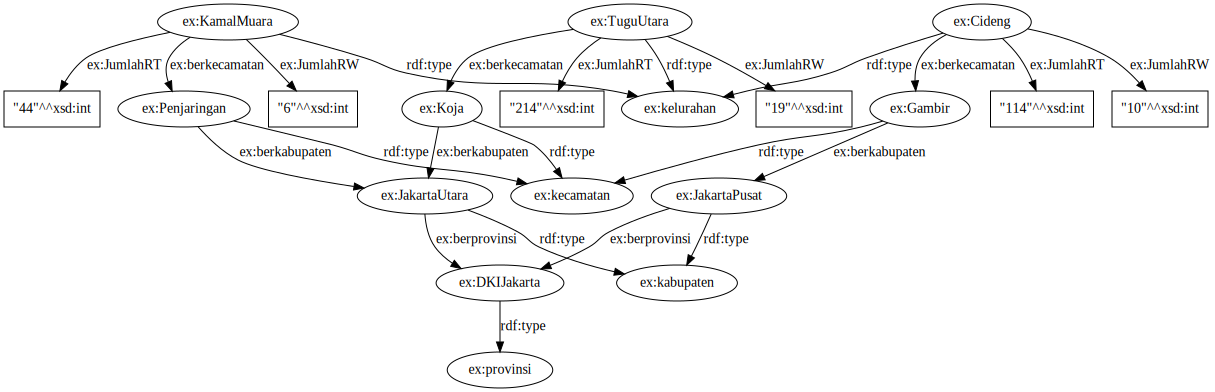

In [ ]:
%%rdf turtle

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix ex: <http://example.com/> .
       

#Kelurahan 

ex:Cideng
  a ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214"^^xsd:int ;
  ex:JumlahRW "19"^^xsd:int .

#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  ex:berkabupaten ex:JakartaPusat .

ex:Penjaringan
  a ex:kecamatan ;
  ex:berkabupaten ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  ex:berkabupaten ex:JakartaUtara .

#Kabupaten  

ex:JakartaPusat
  a ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

ex:JakartaUtara
  a ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .
    
#<Jakarta Utara> <memiliki kecamatan yang bernama> <Penjaringan> .
#<Jakarta Utara> <memiliki kecamatan yang bernama> <Koja> .
#ex:JakartaUtara
#  a ex:kabupaten ;
#  ex:kecamatan ex:Penjaringan, ex:Koja ;
#  ex:provinsi DKIJakarta .

## Vocabulary Perpanjangan dari Vocabulary Populer

Vocabulary ini merupakan perpanjangan dari 'osadm'. Vocabulary 'osadm' adalah vocabulary yang memiliki vocal berhungan nama-nama daerah seperti: negara, kota, kecamatan, kelurahan, dll. Sehingga dataset yang kami uji hampir terkait dengan vocal 'osadm'. Namun tidak semua vocal 'osadm' tercatum pada dataset kami.

### Namespace
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .

@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

@prefix osadm : <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .

@prefix ex: <http://example.com/> .


### Kelas
- osadm:Ward adalah sebuah nama kelas yang menyatakan nama_kelurahan.

- osadm:kecamatan adalah sebuah nama kelas yang menyatakan nama_kecamatan.

- osadm:District adalah sebuah nama kelas yang menyatakan nama_kabupaten/kota.

- ex:provinsi adalah sebuah nama kelas yang menyatakan nama_provinsi.

### Property
- ex:JumlahRT adalah properti jumlah RT dari kelas ex:kelurahan yang bernilai integer(xsd:int).


- ex:JumlahRW adalah properti jumlah RW dari kelas ex:kelurahan yang bernilai integer(xsd:int).

- ex:berkecamatan adalah properti dari kelas ex:kelurahan yang dihubungkan  berasal dari  kelas ex:kecamatan.

- osadm:district adalah properti dari kelas ex:kecamatan yang dihubungkan berasal dari  kelas ex:kabupaten.

- ex:berprovinsi adalah properti dari kelas ex:kabupaten yang dihubungkan  berasal dari  kelas ex:provinsi.

### Data
- 1.Instance(kelurahan)

[ex:Cideng a osadm:Ward, ex:kelurahan]Cideng adalah Kelurahan.

[ex:Cideng ex:berkecamatan ex:Gambir]Cideng berkecamatan di kecamatan Gambir.

[ex:Cideng ex:JumlahRT "114"^^xsd:int]Cideng memiliki jumlah RT sebanyak 144.

[ex:Cideng ex:JumlahRW "10"^^xsd:int]Cideng memiliki jumlah RW sebanyak 10.


- 2.Instance(kecamatan)

[ex:Gambir a ex:kecamatan]Gambir adalah Kecamatan.

[ex:Gambir osadm:district ex:JakartaPusat]Gambir berkabupaten di Jakarta Pusat.

  
- 3.Instance(Kabupaten)

[ex:JakartaPusat a osadm:District, ex:kabupaten]Jakarta Pusat adalah kabupaten.

[ex:JakarataPusat ex:berprovinsi ex:DKIJakarta]Jakarta pusat berprovinsi DKI Jakarta.

- 4.Instance(Provinsi)

[ex:DKIJakarta a ex:provinsi]DKI Jakarta adalah sebuah provinsi.

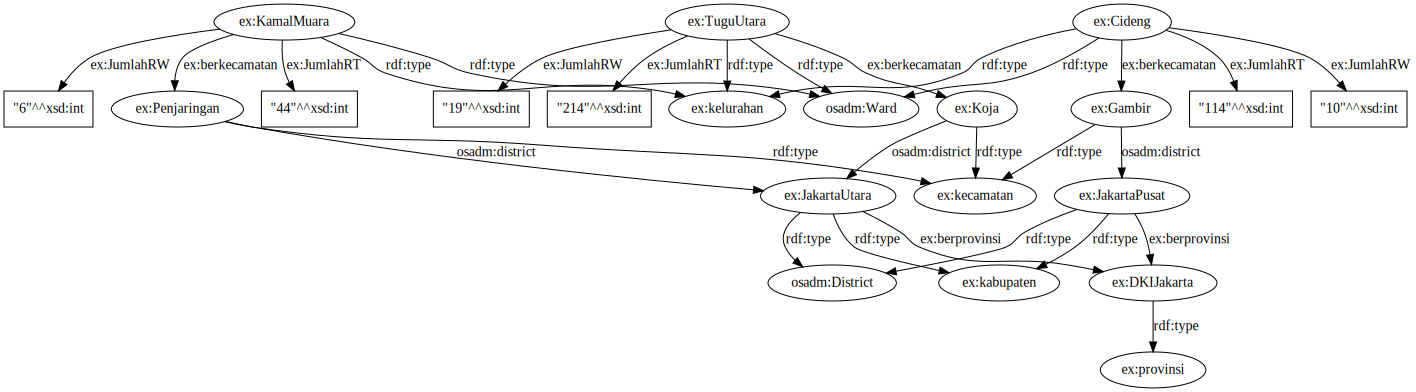

In [ ]:
%%rdf turtle

@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .
@prefix osadm: <http://data.ordnancesurvey.co.uk/ontology/admingeo/> .
@prefix ex: <http://example.com/> .

       

#Kelurahan 

ex:Cideng
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Gambir ;
  ex:JumlahRT "114"^^xsd:int ;
  ex:JumlahRW "10"^^xsd:int .

ex:KamalMuara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Penjaringan ;
  ex:JumlahRT "44"^^xsd:int ;
  ex:JumlahRW "6"^^xsd:int .

ex:TuguUtara
  a osadm:Ward, ex:kelurahan ;
  ex:berkecamatan ex:Koja ;
  ex:JumlahRT "214"^^xsd:int ;
  ex:JumlahRW "19"^^xsd:int .

#Kecamatan

ex:Gambir
  a ex:kecamatan ;
  osadm:district ex:JakartaPusat .

ex:Penjaringan
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

ex:Koja
  a ex:kecamatan ;
  osadm:district ex:JakartaUtara .

#Kabupaten  

ex:JakartaPusat
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

ex:JakartaUtara
  a osadm:District, ex:kabupaten ;
  ex:berprovinsi ex:DKIJakarta .

#Provinsi

ex:DKIJakarta
  a ex:provinsi .
    
#<Jakarta Utara> <memiliki kecamatan yang bernama> <Penjaringan> .
#<Jakarta Utara> <memiliki kecamatan yang bernama> <Koja> .
#ex:JakartaUtara
#  a ex:kabupaten ;
#  ex:kecamatan ex:Penjaringan, ex:Koja ;
#  ex:provinsi DKIJakarta .

##Daftar Pustaka:

1.   Rakhmawati, N. A. (2015). Semantic Web dan Linked Data. Yogyakarta, Indonesia: SiBuku.
2. https://doi.org/10.5281/zenodo.5521104
3. https://data.jakarta.go.id/dataset/jumlahrtrwperkelurahandkijakarta






